import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.read_csv('/Users/adamberger/Desktop/Markowitz_Data.csv', index_col = "Date")

<Axes: xlabel='Date'>

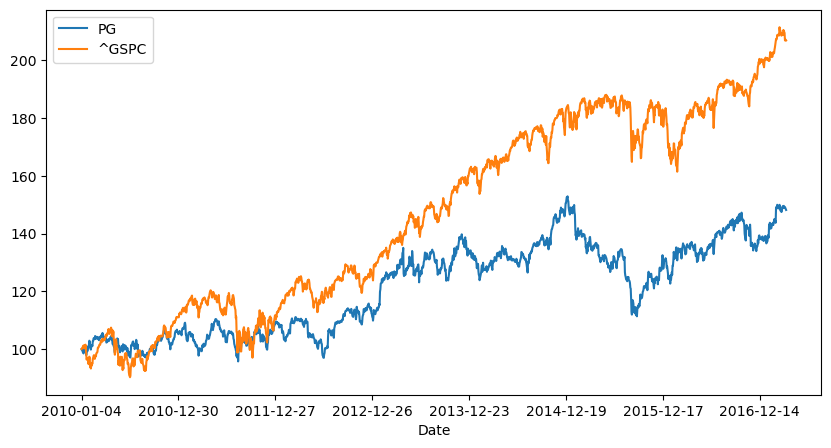

In [3]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [4]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [5]:
log_returns.mean()*250

PG       0.054082
^GSPC    0.099971
dtype: float64

In [6]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.02048,0.012490
^GSPC,0.01249,0.023401


In [7]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


In [8]:
num_assets = len(assets)

In [9]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.72968058, 0.27031942])

In [10]:
weights[0] + weights[1]

1.0

In [11]:
np.sum(weights * log_returns.mean())*250

0.06648668739747866

In [12]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.017541270470031314

In [13]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.13244346140912852

In [14]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([0.09174753644795608,
  0.06776245979088241,
  0.05765554798020426,
  0.07916978456032109,
  0.09350432339457738,
  0.08486316041603228,
  0.06599918932895901,
  0.07538268428685543,
  0.0780159616284885,
  0.07243969028928617,
  0.0633394387367351,
  0.06579474186621917,
  0.08373230135219144,
  0.08027598260983775,
  0.07470299356059727,
  0.08246295413708042,
  0.07083338714126755,
  0.08800379721574203,
  0.08380378062073561,
  0.09502472610646949,
  0.07564112228132908,
  0.08742276150357135,
  0.08494003287554037,
  0.07547391720237051,
  0.07643742723845393,
  0.08128640955414475,
  0.07264437037956842,
  0.09698557385927603,
  0.059312196857227356,
  0.0802410631898897,
  0.07947829969367103,
  0.06476195075632211,
  0.09844298419355862,
  0.05952938922396553,
  0.06073509418706057,
  0.07617196513368979,
  0.09100589704458126,
  0.08569718323191358,
  0.057498804428872174,
  0.07077865763752335,
  0.07717426153083831,
  0.07435980072043559,
  0.08076867747143036,
  0.05978037

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities

(array([0.08064898, 0.06915948, 0.06595324, 0.06964564, 0.09166944,
        0.08015652, 0.07748199, 0.06484523, 0.07537941, 0.08287644,
        0.07882254, 0.06659422, 0.07652464, 0.08615241, 0.08950433,
        0.0878823 , 0.06944226, 0.07786824, 0.07339377, 0.06957477,
        0.09989592, 0.05980739, 0.08075395, 0.06817501, 0.06102298,
        0.07108829, 0.07595001, 0.06520422, 0.09269894, 0.08517083,
        0.07788043, 0.05691133, 0.05778218, 0.06889165, 0.07166067,
        0.09123418, 0.05902907, 0.08628369, 0.09630967, 0.07443233,
        0.07657899, 0.08217084, 0.06140702, 0.07536147, 0.07252687,
        0.09815652, 0.05849556, 0.06509721, 0.08254339, 0.06160522,
        0.07601105, 0.0897467 , 0.09420525, 0.09732931, 0.07674767,
        0.07179083, 0.0651861 , 0.05890993, 0.07322473, 0.09513997,
        0.07014156, 0.09900365, 0.0685774 , 0.09009587, 0.06314069,
        0.08756588, 0.06552615, 0.07753034, 0.06691295, 0.07143674,
        0.06040984, 0.05935218, 0.07766318, 0.07

In [20]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [21]:
portfolios.head()

,Return,Volatility
0,0.080649,0.132527
1,0.069159,0.131415
2,0.065953,0.132706
3,0.069646,0.131279
4,0.091669,0.141675


Text(0, 0.5, 'Expected Return')

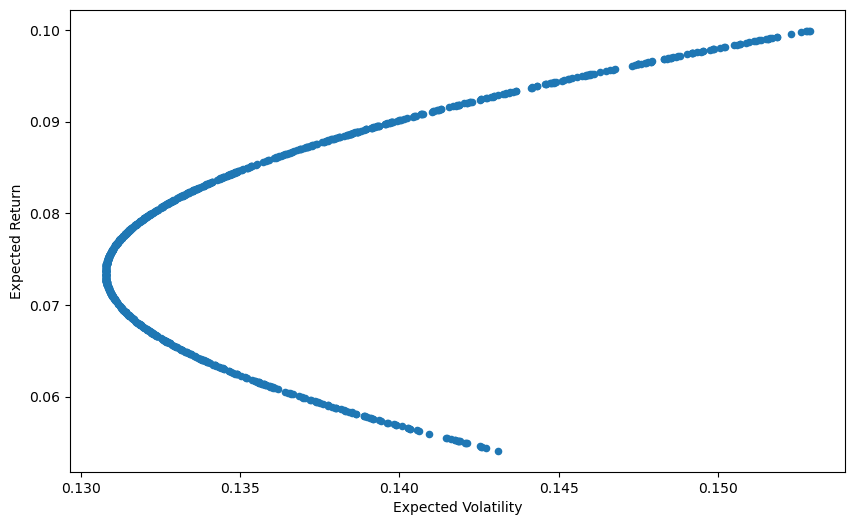

In [22]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')